# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [15]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
fitbit = pd.read_csv("../data/Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

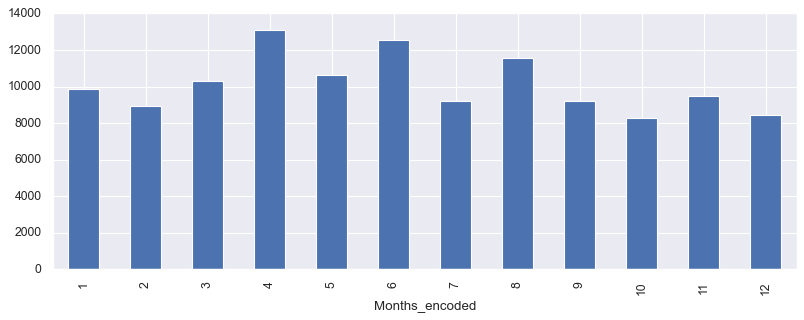

In [143]:
#### Explore plt.sca Explore plt.xticks I don't know how to use them

plt.figure(figsize=(12,4))
fitbit_steps_month = fitbit["Steps"].groupby(fitbit["Months_encoded"]).mean()
av_steps_month = fitbit_steps_month.plot(kind="bar")
plt.savefig("../figures/av_steps_month.png", dpi=1000)

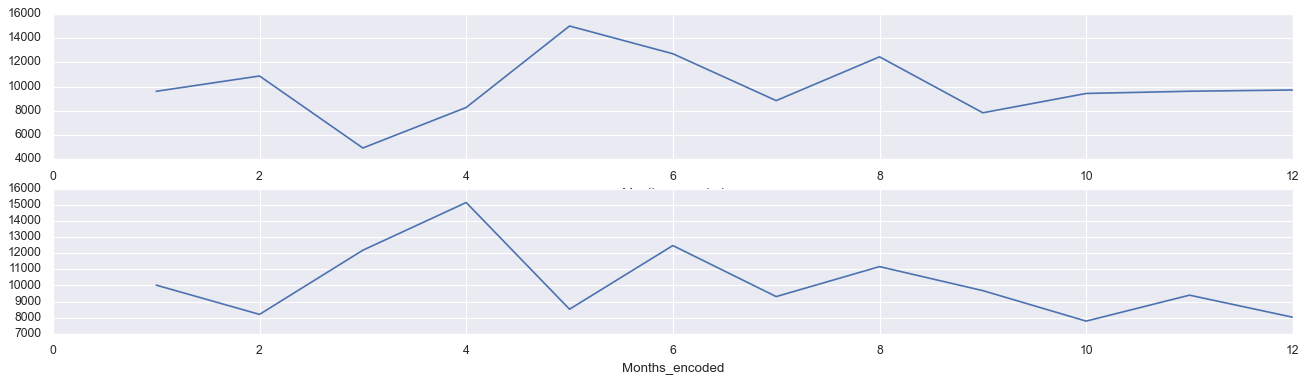

In [142]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20,5))
av_steps_wekends = fitbit[(fitbit["Work_or_Weekend"]==0)]["Steps"].groupby(fitbit["Months_encoded"]).mean().plot(ax=axs[0])
av_steps_work = fitbit[(fitbit["Work_or_Weekend"]==1)]["Steps"].groupby(fitbit["Months_encoded"]).mean().plot(ax=axs[1])
plt.savefig("../figures/av_steps_work_wekens.png", dpi=1000)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

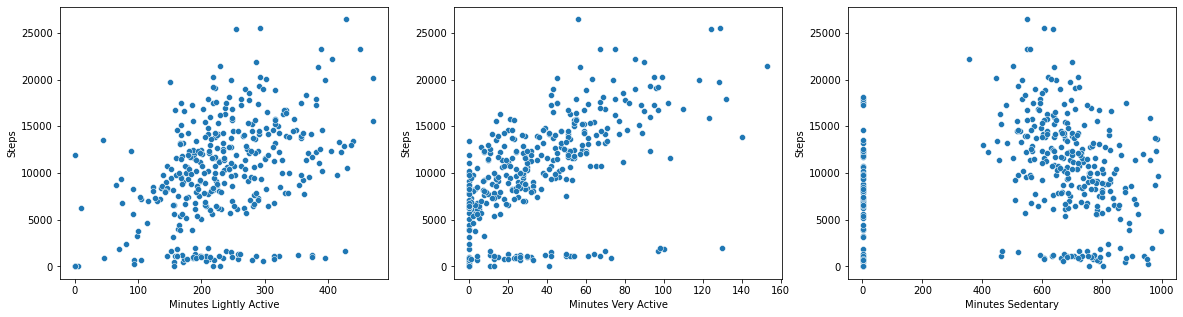

In [54]:
loop = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
for i, v in enumerate(loop):
    sns.scatterplot(x=v, y="Steps", data=fitbit, ax=axs[i])


## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [55]:
titanic = pd.read_csv("../data/titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [56]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [67]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=["int64", "float64"]).dtypes.index

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [64]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=["object"]).dtypes.index

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [80]:
plt.style.use('classic')
plt.figure(figsize=(12,6))
sns.set(rc={'figure.figsize':(12,6)})
sns.set_style("darkgrid")

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

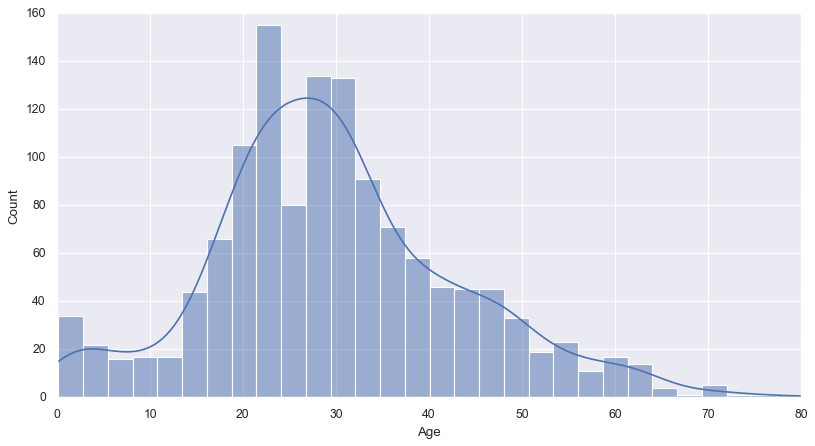

In [81]:
graf = sns.histplot(x=titanic.Age, kde=True)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

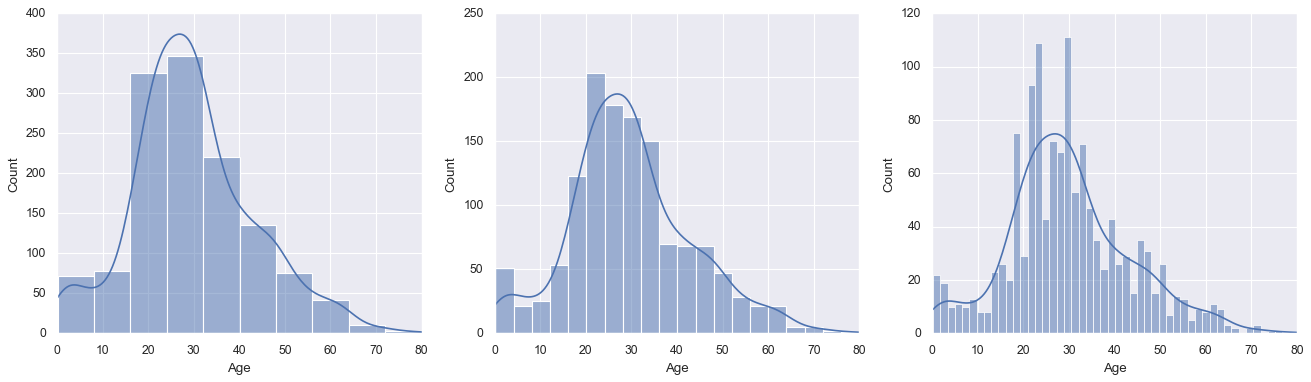

In [96]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
age_10 = sns.histplot(x=titanic.Age, kde=True, bins=10, ax=axs[0])
age_20 = sns.histplot(x=titanic.Age, kde=True, bins=20, ax=axs[1])
age_50 = sns.histplot(x=titanic.Age, kde=True, bins=50, ax=axs[2])

#### How does the bin size affect your plot?

In [ ]:
"""
If the beans are too much or too low affects how easy is too see the distribution of the data
"""

#### Use seaborn to show the distribution of column `Age`.

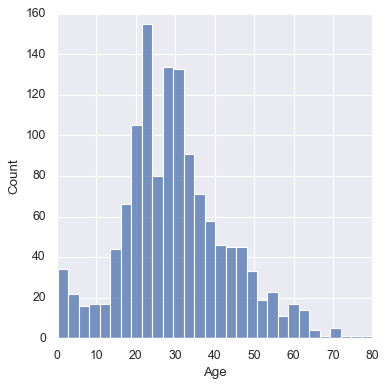

In [98]:
sns.displot(titanic, x="Age")

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

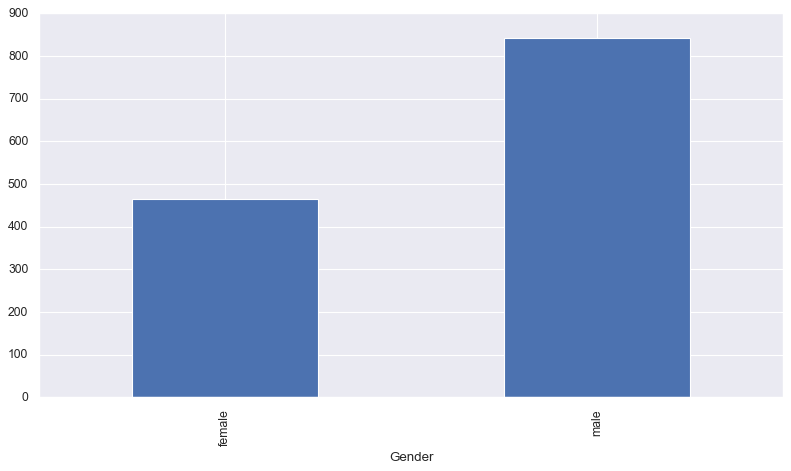

In [106]:
# Method 1 - matplotlib
matlib_gender = titanic.groupby(["Gender"])["Gender"].count().plot(kind="bar")

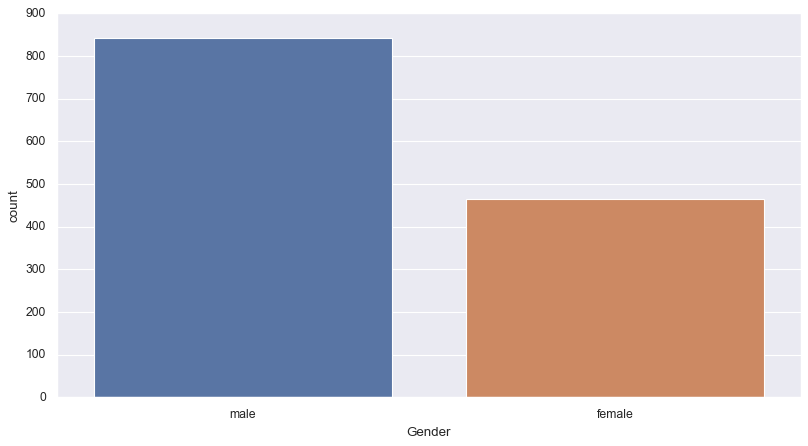

In [100]:
# Method 2 - seaborn
seaborn_gender=sns.countplot(x=titanic.Gender)

#### Use the right plot to visualize the column `Pclass`.

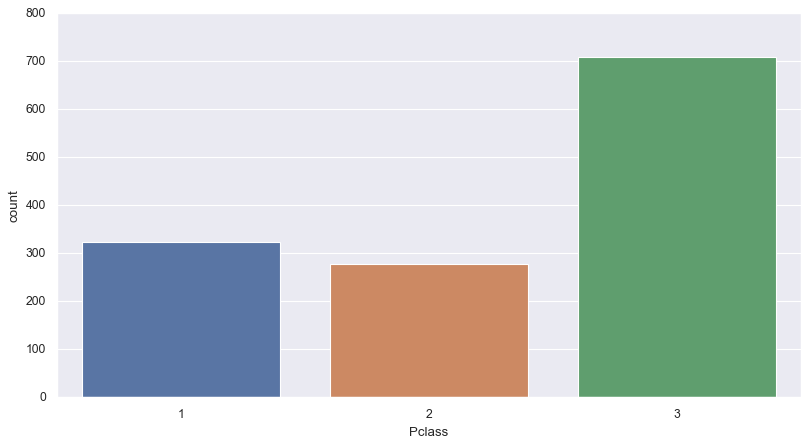

In [107]:
seaborn_gender=sns.countplot(x=titanic.Pclass)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

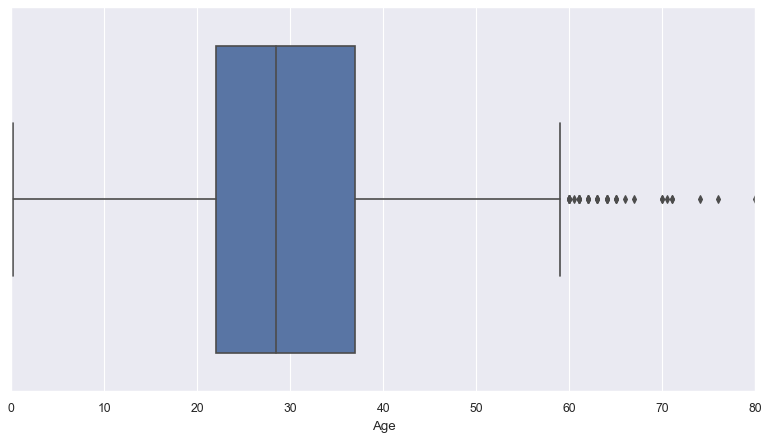

In [111]:
sns.boxplot(x="Age", data=titanic)

In [145]:
"""
your comments here
"""
titanic["Age"].describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
min=0
max between 50 and 60
Some outliners
Most people more than 20 and less than 40
median around 28
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

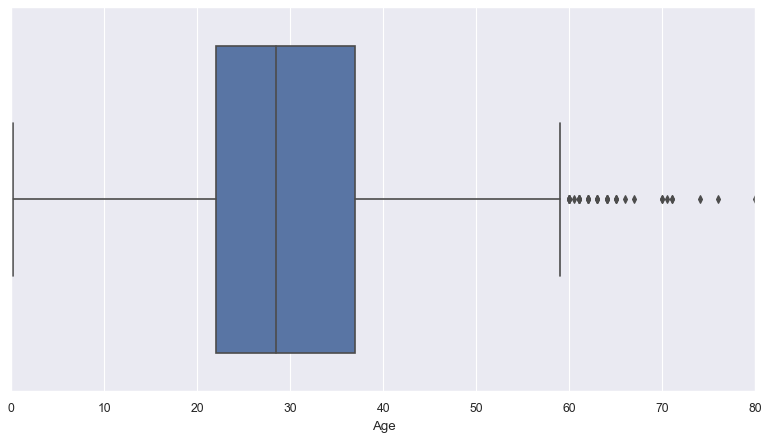

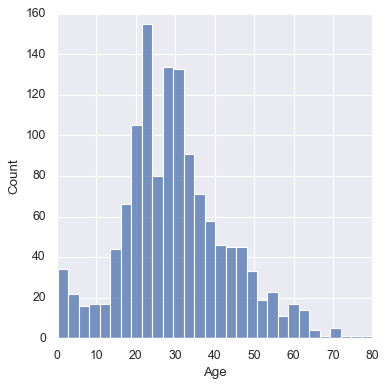

In [112]:
sns.boxplot(x="Age", data=titanic)
sns.displot(titanic, x="Age")

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

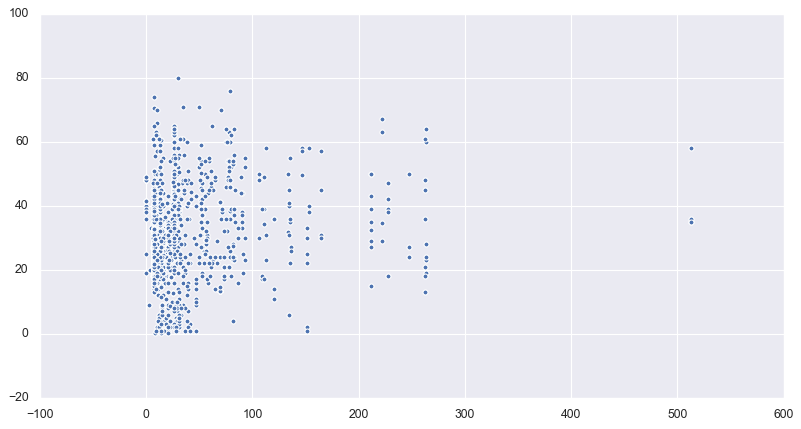

In [113]:
# Method 1 - matplotlib
plt.scatter(x=titanic.Fare, y=titanic.Age);

<AxesSubplot:xlabel='Fare', ylabel='Age'>

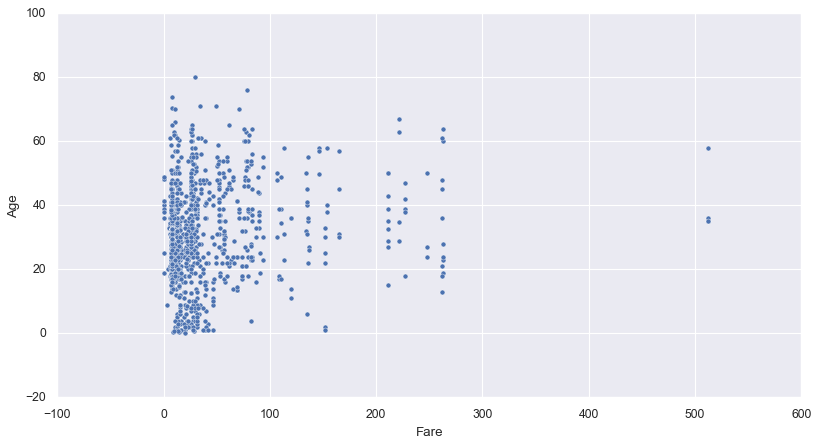

In [110]:
# Method 2 - seaborn
sns.scatterplot(x="Fare", y="Age", data=titanic)

#### Plot the correlation matrix using seaborn.

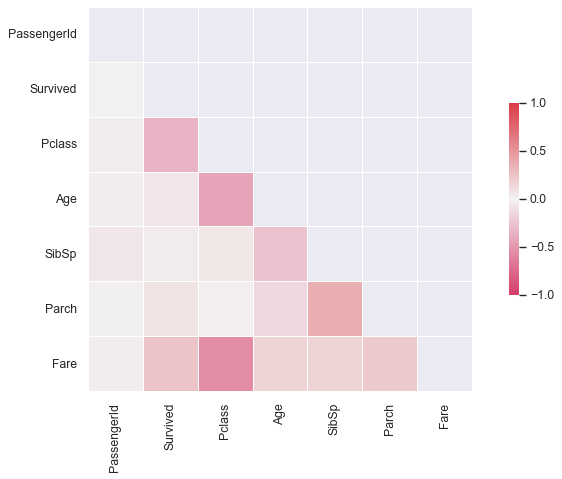

In [115]:
corr = titanic.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,  
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1, #defining max range
            vmin=-1, #defining min range
            cbar_kws={"shrink": .5} #steps for the scale
);

#### What are the most correlated features?

In [ ]:
"""
Pclass and Survived
Pclass and Age
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

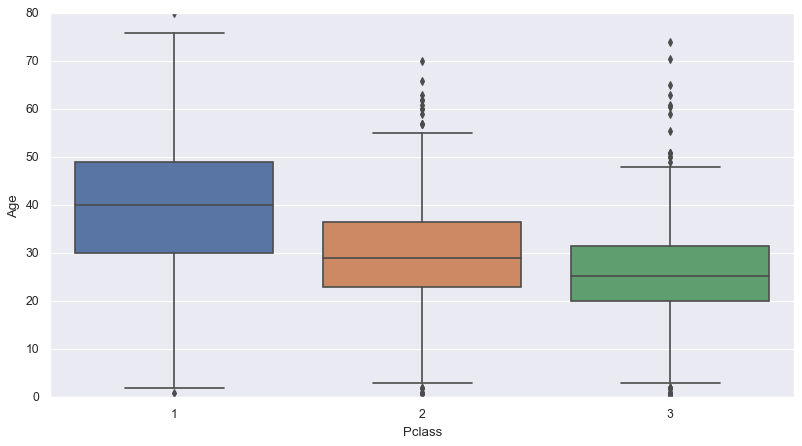

In [124]:
sns.boxplot(x="Pclass", y="Age", data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

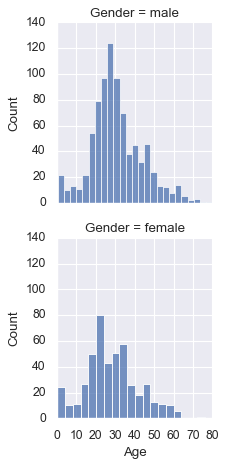

In [130]:
g = sns.FacetGrid(titanic, row="Gender")
g.map(sns.histplot, "Age")